In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Задание:

Посмотрите у кого больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [2]:
data = pd.read_csv('data/accountancy.csv')
data.head()

FileNotFoundError: [Errno 2] File b'accountancy.csv' does not exist: b'accountancy.csv'

In [3]:
data.groupby(['Executor', 'Type']).aggregate({'Salary': 'mean'})

NameError: name 'data' is not defined

Задание:

Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.

In [4]:
data_dota = pd.read_csv('data/dota_hero_stats.csv')
data_dota.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

Задание:

Найдите среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

In [5]:
data_algae = pd.read_csv('data/algae.csv')
data_algae.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [6]:
concentrations = data_algae.groupby('genus')
mean_concentrations = concentrations.mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


Задание:

Укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

In [7]:
data_algae.groupby('genus').aggregate({'alanin' : ['min', 'mean', 'max']}).loc['Fucus'].round(2)

alanin  min     0.35
        mean    3.57
        max     6.64
Name: Fucus, dtype: float64

Задание:

Сгруппируйте данные по переменной group и соотнесите вопросы с ответами.

In [8]:
num_algae = data_algae.groupby('group').count() #Число видов водорослей каждого цвета
var_algae = data_algae.groupby('group').agg({'citrate': 'var'}) #Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях
std_algae = data_algae.groupby('group').agg({'sucrose':  lambda x: max(x) - min(x) }) #Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях
print(num_algae, var_algae, std_algae)

       species  genus  sucrose  alanin  citrate  glucose  oleic_acid
group                                                               
brown        6      6        6       6        6        6           6
green        3      3        3       3        3        3           3
red          1      1        1       1        1        1           1         citrate
group          
brown  5.468942
green  3.950113
red         NaN         sucrose
group          
brown  5.189345
green  3.259662
red    0.000000


Задание:

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

In [9]:
data_income = pd.read_csv('data/income.csv')

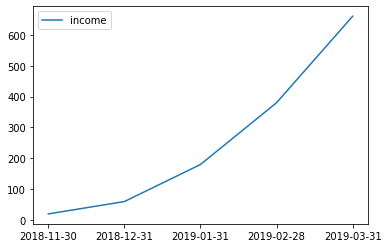

In [12]:
sns.lineplot(data=data_income)

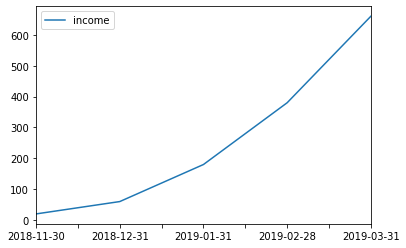

In [13]:
data_income.plot()

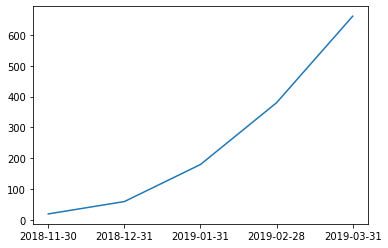

In [14]:
plt.plot(data_income.index, data_income.income)

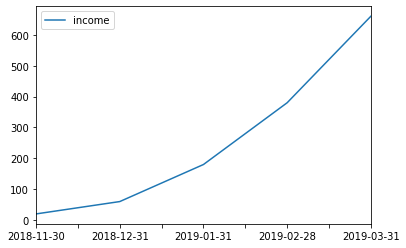

In [15]:
data_income.plot(kind='line')

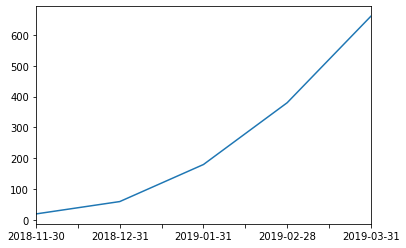

In [16]:
data_income['income'].plot()

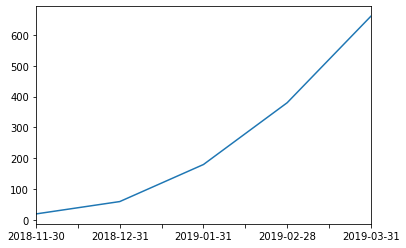

In [17]:
data_income.income.plot()

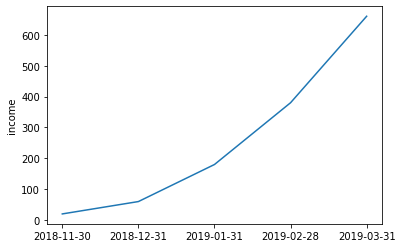

In [18]:
sns.lineplot(x=data_income.index, y=data_income.income)

Задание:

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

В ответе вы должны указать число кластеров в виде числа.

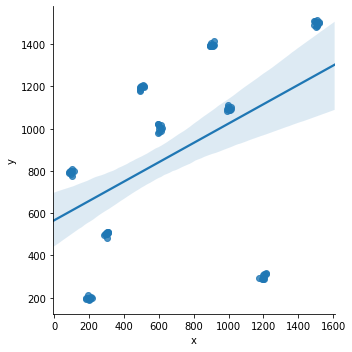

In [23]:
sns.lmplot(x='x',y='y', data=pd.read_csv('data/dataset_209770_6.txt',sep=' '))
#df = pd.read_csv('dataset_209770_6.txt', sep=' ', header=None) один из варианта
#sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1])

Задание:

Постройте тепловую карту, чтобы различия было видно наглядно.

In [54]:
data_warm = pd.read_csv('data/genome_matrix.csv', index_col=0)
data_warm.dtypes
g = sns.heatmap(data_warm, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

species0    float64
species1    float64
species2    float64
species3    float64
species4    float64
dtype: object

Задание:

Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

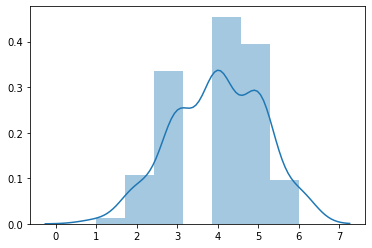

In [83]:
data_dota2 = pd.read_csv('data/dota_hero_stats.csv')
sns.distplot([x.count(',')+1 for x in data_dota2.roles])

Задание:

Cкачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

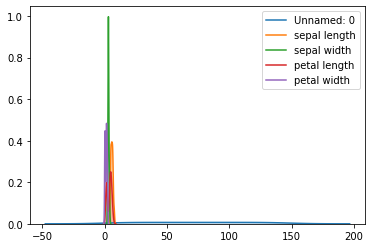

In [103]:
data_iris = pd.read_csv('data/iris.csv')
for column in data_iris.drop('species', axis=1):
    ax = sns.kdeplot(data_iris[column], shade=True)

Задание:

Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота.

In [109]:
data_iris = data_iris.rename(columns={'petal length' : 'petal_length'})
iris = sns.violinplot(data_iris.petal_length, orient = 'v')

Задание:

Постройте pairplot и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?

LinAlgError: singular matrix

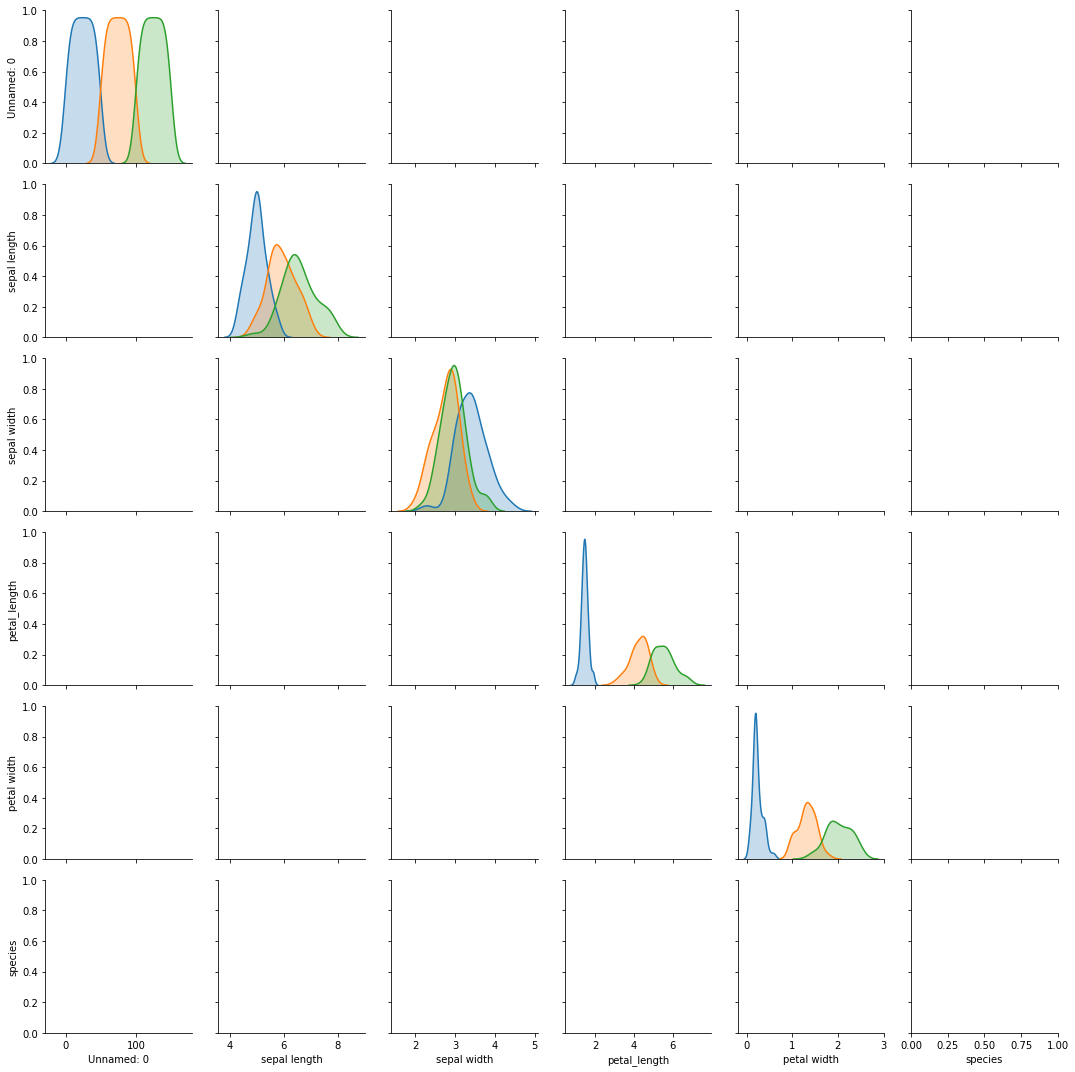

In [131]:
irisis = sns.pairplot(data_iris, hue='species')
